In [1]:
import pandas as pd,numpy as np

In [2]:
courses = pd.read_csv("04/courses.csv")
deliveries = pd.read_csv("04/deliveries.csv")
matches= pd.read_csv("04/matches.csv")
nov = pd.read_csv("04/reg-month1.csv")
dec = pd.read_csv("04/reg-month2.csv")
students = pd.read_csv("04/students.csv")

In [3]:
courses

,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499
5,6,power bi,1899
6,7,ms sxcel,1599
7,8,pandas,1099
8,9,plotly,699
9,10,pyspark,2499


students dataset contains the data about students and their study partners(this column contains the student_id of the partner)

In [4]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


This dataset contains about the students enrolled in which course in nov in a platform

In [5]:
nov

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


This dataset contains about the students enrolled in which course in dec in a platform

In [6]:
dec

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


1. pd.concat
2. ignore_index
3. mullitindex -> fetch using iloc
4. concat dataframes horizontally

### 1. pd.concat

Sometimes we need to stack both dataframes into each other vertically

In [7]:
pd.concat([nov,dec])

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [8]:
pd.concat([nov,dec]).shape

(53, 2)

here we can see that index is repeating and data is with the same index it was before with so, for that reason we could use ignore_index att

In [9]:
regs = pd.concat([nov,dec],ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


If we want to keep there index then we use keys att.
The keys parameter adds a hierarchical index (MultiIndex) to the result. This is helpful when you're concatenating multiple DataFrames and want to track where each row came from.

In [10]:
temp = pd.concat([nov,dec],keys=["nov","dec"])
# this makes the new df to be multiindex df
len(temp.index[0])

2

In [11]:
#if want to look for a data that are in nov
temp.loc["nov"]
#if want to look for a data that are in 23,nov
temp.loc[("nov",23)]
#if want to look for a student_id that are in 23,nov 
temp.loc[("nov",23),"student_id"]
#if want to look for a student_id and course_id that are in 23,nov 
temp.loc[("nov",23),("student_id","course_id")]
#or
temp.loc[("nov",23),["student_id","course_id"]]

student_id    25
course_id     10
Name: (nov, 23), dtype: int64

### Concating DataFrames horizontally

0	Vertical ↓	Columns (row-wise)

1	Horizontal →	Rows (column-wise)

In [12]:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


* When concating rows-wise if a df has more columns or unmatched columns name than the other then it would place NAN there 
* When concating columns-wise if a df has more rows or unmatched rows index than the other then it would place NAN there 

### inner-join

inner joining students and regs;

common column -> student_id

In [13]:
pd.merge(students,regs,on="student_id",how="inner")#default->inner
#or
students.merge(regs,on="student_id",how="inner")

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


### left-join

In [14]:
courses.merge(regs,on="course_id",how="left")

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


### right-join

In [15]:
temp = pd.DataFrame({
    "student_id":[26,27,28],
    "name":["Xavi","Xabi","Zico"],
    "partner":[1,2,3]
})
temp

,student_id,name,partner
0,26,Xavi,1
1,27,Xabi,2
2,28,Zico,3


In [16]:
students = pd.concat([students,temp],ignore_index=True)
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [17]:
pd.merge(students,regs,on="student_id",how="right")

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [18]:
pd.merge(students,regs,on="student_id",how="left")

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1.0
1,1,Kailash Harjo,23,6.0
2,1,Kailash Harjo,23,10.0
3,1,Kailash Harjo,23,9.0
4,2,Esha Butala,1,5.0
5,3,Parveen Bhalla,3,3.0
6,3,Parveen Bhalla,3,5.0
7,4,Marlo Dugal,14,NaN
8,5,Kusum Bahri,6,NaN
9,6,Lakshmi Contractor,10,NaN


### outer-join

In [19]:
pd.merge(students,regs,on="student_id",how="outer").tail(10)

,student_id,name,partner,course_id
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,26,Xavi,1.0,NaN
58,27,Xabi,2.0,NaN
59,28,Zico,3.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0
62,50,NaN,NaN,8.0


#### 1.Find the total revenue generated

In [20]:
pd.merge(courses,regs,on="course_id",how="inner")["price"].sum()

154247

#### 2.Find month by month revenue

In [21]:
regs_month = pd.concat([nov,dec],keys=["nov","dec"])
regs_month.reset_index().merge(courses,on="course_id",how="inner").groupby("level_0")["price"].sum()

level_0
dec    65072
nov    89175
Name: price, dtype: int64

#### 3. Print the registration table
cols:[name,course,price]

In [22]:
regs.merge(students,on='student_id').merge(courses,on='course_id')[['name','course_name','price']]
#or
reg_table = pd.merge(students,regs,on="student_id",how="inner")
reg_table.merge(courses,on="course_id",how="inner").drop(["course_id","student_id","partner"],axis=1)

,name,course_name,price
0,Kailash Harjo,python,2499
1,Kailash Harjo,power bi,1899
2,Kailash Harjo,pyspark,2499
3,Kailash Harjo,plotly,699
4,Esha Butala,tableau,2499
5,Parveen Bhalla,data analysis,4999
6,Parveen Bhalla,tableau,2499
7,Tarun Thaker,pandas,1099
8,Tarun Thaker,pyspark,2499
9,Tarun Thaker,ms sxcel,1599


#### 4.Plot bar chart for revenue/course 

<Axes: xlabel='course_name'>

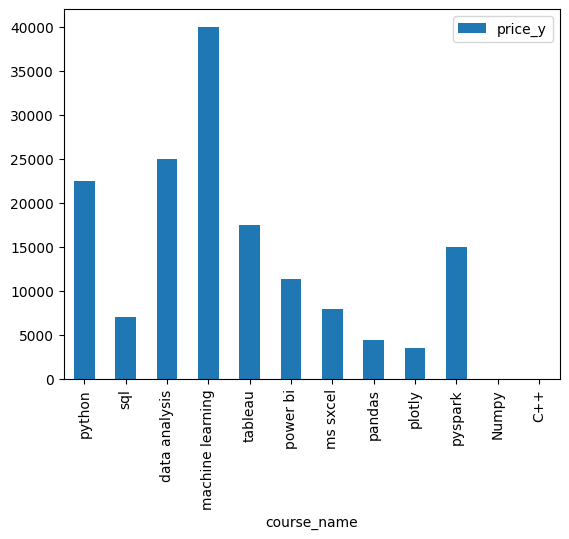

In [23]:
pd.merge(courses,pd.merge(regs,courses,on="course_id",how="inner").groupby("course_name").sum(),on="course_name",how="left").plot(kind="bar",x="course_name",y="price_y")

#### 5.Find the students who enrolled in both the months

In [24]:
pd.merge(pd.merge(nov,students,on="student_id",how="inner"),pd.merge(dec,students,on="student_id",how="inner"),on="name",how="inner")["name"].drop_duplicates()

0         Chhavi Lachman
2        Fardeen Mahabir
5           Elias Dodiya
8          Kailash Harjo
10          Tarun Thaker
13            Yash Sethi
20    David Mukhopadhyay
26          Yasmin Palan
29        Parveen Bhalla
Name: name, dtype: object

#### 6.Find the courses with no enrollment

In [25]:
courses[~ courses["course_id"].isin(regs["course_id"])]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


#### 7.Find the students who didnt enroll in any course

In [26]:
students[~ students["student_id"].isin(regs["student_id"])]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Xavi,1
26,27,Xabi,2
27,28,Zico,3


In [27]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


#### 8.Print students name -> partner name for all enrolled students

#### self.join 
when same table joins with itself

 when you want to merge two DataFrames but the column names you want to merge on are different in each DataFrame, you should use the left_on and right_on parameters.

In [45]:
pd.merge(students.merge(students,left_on="student_id",right_on="partner"),regs,left_on="student_id_x",right_on="student_id")[["name_x","name_y"]].drop_duplicates().rename(columns={"name_x":"name","name_y":"partner"})

,name,partner
0,Kailash Harjo,Esha Butala
4,Kailash Harjo,Xavi
8,Esha Butala,Shashank D’Alia
9,Esha Butala,Xabi
10,Parveen Bhalla,Parveen Bhalla
12,Parveen Bhalla,Zico
14,Tarun Thaker,Yasmin Palan
19,David Mukhopadhyay,Hanuman Hegde
22,Radha Dutt,Qabeel Raman
26,Munni Varghese,Fardeen Mahabir


#### 9.Find top 3 students who did most enrollments 

In [62]:
pd.merge(regs,students,on="student_id",how="inner")[["student_id","name"]].value_counts().head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: count, dtype: int64

#### 10.Find the student who spent the most money 

In [63]:
pd.merge(pd.merge(regs,students,on="student_id",how="inner"),courses,on="course_id",how="inner").groupby(["student_id","name"])["price"].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

In [79]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


### IPL Problem

#### Find top 3 stadiums with highest sixes/match ratio

In [89]:
sixes = pd.merge(deliveries[deliveries["batsman_runs"] == 6],matches,left_on="match_id",right_on="id",how="inner").groupby("venue")["batsman_runs"].count()
match = matches["venue"].value_counts()
(sixes/match).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

#### Find orange cap holders of all the seasons

In [109]:
pd.merge(deliveries,matches,left_on="match_id",right_on="id",how="inner").groupby(["season","batsman"])["batsman_runs"].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset="season").sort_values(by="season").set_index("season")

,batsman,batsman_runs
season,,
2008,SE Marsh,616
2009,ML Hayden,572
2010,SR Tendulkar,618
2011,CH Gayle,608
2012,CH Gayle,733
2013,MEK Hussey,733
2014,RV Uthappa,660
2015,DA Warner,562
2016,V Kohli,973
